# Reducing hospital readmissions

## 📖 Background
You work for a consulting company helping a hospital group better understand patient readmissions. The hospital gave you access to ten years of information on patients readmitted to the hospital after being discharged. The doctors want you to assess if initial diagnoses, number of procedures, or other variables could help them better understand the probability of readmission. 

They want to focus follow-up calls and attention on those patients with a higher probability of readmission.

## 💾 The data
You have access to ten years of patient information ([source](https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008)):

#### Information in the file
- "age" - age bracket of the patient
- "time_in_hospital" - days (from 1 to 14)
- "n_procedures" - number of procedures performed during the hospital stay
- "n_lab_procedures" - number of laboratory procedures performed during the hospital stay
- "n_medications" - number of medications administered during the hospital stay
- "n_outpatient" - number of outpatient visits in the year before a hospital stay
- "n_inpatient" - number of inpatient visits in the year before the hospital stay
- "n_emergency" - number of visits to the emergency room in the year before the hospital stay
- "medical_specialty" - the specialty of the admitting physician
- "diag_1" - primary diagnosis (Circulatory, Respiratory, Digestive, etc.)
- "diag_2" - secondary diagnosis
- "diag_3" - additional secondary diagnosis
- "glucose_test" - whether the glucose serum came out as high (> 200), normal, or not performed
- "A1Ctest" - whether the A1C level of the patient came out as high (> 7%), normal, or not performed
- "change" - whether there was a change in the diabetes medication ('yes' or 'no')
- "diabetes_med" - whether a diabetes medication was prescribed ('yes' or 'no')
- "readmitted" - if the patient was readmitted at the hospital ('yes' or 'no') 

***Acknowledgments**: Beata Strack, Jonathan P. DeShazo, Chris Gennings, Juan L. Olmo, Sebastian Ventura, Krzysztof J. Cios, and John N. Clore, "Impact of HbA1c Measurement on Hospital Readmission Rates: Analysis of 70,000 Clinical Database Patient Records," BioMed Research International, vol. 2014, Article ID 781670, 11 pages, 2014.*

In [2]:
import pandas as pd
df = pd.read_csv('data/hospital_readmissions.csv')
df.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no


# **Summary**

Most common primary diagnosis per age group:
- For 40-50: Others
- All age group except 40-50: Circulatory

Readmission rate of those who were diagnosed with diabetes vs to those who were not diagnosed with diabetes:
- Diagnosed with diabetes: 0.4653
- Not diagnosed with diabetes: 0.4728

Characteristics of those with higher probability of being readmitted compared to their relative categories:

Age group:
- 70-80
- 80-90

Visits:
- Outpatient
- Inpatient
- Emergency

Medical Specialty:
- Emergency/Trauma
- Family/General Practice
- Missing

Diagnosis category:
- Circulatory
- Respiratory


# **Recommendation**

Due to the limitations of my current skillset, creating a machine learning model combining of those with a higher readmission rate characteristics would create better predictions and give probabilities of a patient being readmitted. Also, a logistic regression model for the number of inpatient, outpatient and emergency visits would be ideal.

# **Data Validation**

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                25000 non-null  object
 1   time_in_hospital   25000 non-null  int64 
 2   n_lab_procedures   25000 non-null  int64 
 3   n_procedures       25000 non-null  int64 
 4   n_medications      25000 non-null  int64 
 5   n_outpatient       25000 non-null  int64 
 6   n_inpatient        25000 non-null  int64 
 7   n_emergency        25000 non-null  int64 
 8   medical_specialty  25000 non-null  object
 9   diag_1             25000 non-null  object
 10  diag_2             25000 non-null  object
 11  diag_3             25000 non-null  object
 12  glucose_test       25000 non-null  object
 13  A1Ctest            25000 non-null  object
 14  change             25000 non-null  object
 15  diabetes_med       25000 non-null  object
 16  readmitted         25000 non-null  objec

In [4]:
for column in df.columns:
    print('{}: {}'.format(column, df[column].unique()))

age: ['[70-80)' '[50-60)' '[60-70)' '[40-50)' '[80-90)' '[90-100)']
time_in_hospital: [ 8  3  5  2  1  4  7 10  6 12 11  9 14 13]
n_lab_procedures: [ 72  34  45  36  42  51  44  19  67  37  35  69  60  73  52   9  16  62
  54  58  40  23  32  65   1  47  39  59  68  66  43  30  46  48   5  24
  70  25  29  49  53  94  18  61  11  33  28  83  50  71  86  38   3  41
  31  55  56  27  64  82  26  90  21   2  20  17  78 102  75  15   8   7
  76  63  57  10   4  22  91  74  14  13  89  79  81  84  80   6  77  12
 108  88  92  93 101  97 100  85  95  87  98  96  99 103 111 106 113 109
 105]
n_procedures: [1 2 0 6 3 5 4]
n_medications: [18 13 12  7 10 21 16  6 26 20 11 27 15  8 22 17 14 28  5 24  9 19  1 25
 32  3 31 23 39 34 40  4 38  2 33 56 44 29 46 30 47 41 35 36 50 49 54 57
 60 37 61 52 51 42 53 43 45 59 62 79 63 55 65 48 58 69 68 72 75 64]
n_outpatient: [ 2  0  1  3  7  5  4  6  9  8 11 10 15 21 13 12 27 16 14 33 20 18 23]
n_inpatient: [ 0  2  3  1  6  9  7  4  5  8 10 11 14 12 15 13]
n

Data seems clean based on the values inside the cells.

# **Data Exploration and Analysis**

## What is the most common primary diagnosis per age group?

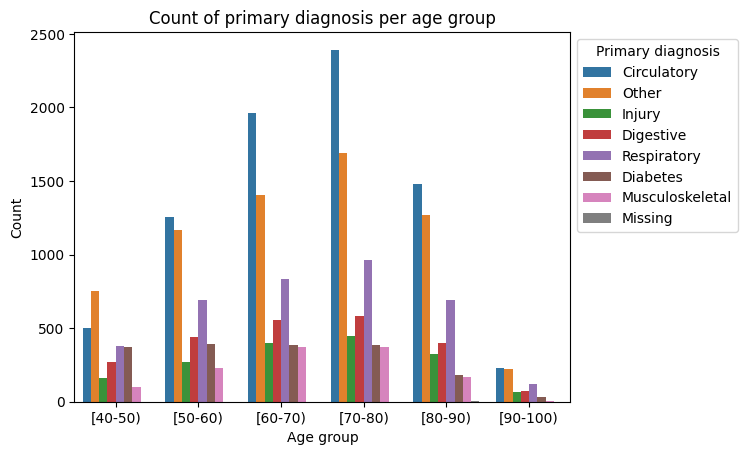

In [5]:
age = df['age'].unique()
age_list = sorted(list(age))
sns.countplot(x='age', data=df, hue='diag_1', order=age_list)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', title='Primary diagnosis')
plt.xlabel('Age group')
plt.ylabel('Count')
plt.title('Count of primary diagnosis per age group')
plt.show()

The most common diagnosis for all age groups in the data set is circulatory except for those in their 40s whose most common diagnosis is categorized as others.

Since the doctors believe that diabetes play a central role wether a patient will be readmitted or not, the proportion of readmission rate of those who were diagnosed with diabetes were compared to those that were not diagnosed with diabetes.

In [6]:
replace = {'yes':'1','no':'0'}
df['readmitted'] = df['readmitted'].replace(replace).astype('int')
diabetes = ((df['diag_1'] == 'Diabetes') | (df['diag_2'] == 'Diabetes') | (df['diag_3'] == 'Diabetes'))

with_diabetes = df[diabetes]
without_diabetes = df[~diabetes]

print('Proportion of readmitted patients with diabetes: {}'.format(with_diabetes['readmitted'].mean()))
print('Proportion of readmitted patients without diabetes: {}'.format(without_diabetes['readmitted'].mean()))

Proportion of readmitted patients with diabetes: 0.4652935821574875
Proportion of readmitted patients without diabetes: 0.4727979274611399


Based on the proportions, diabetes doesn't seem to greatly affect the probability of a person being readmitted since the proportion of the patients readmitted without diabetes is higher compared to those with diabetes.

## Age group readmission rates

In [7]:
age_group = df.groupby('age')['readmitted'].agg('mean')
print(age_group, '\n')

print('Mean diff of age groups from age group mean')
for age, value in age_group.items():
    diff = value - age_group.mean()
    print('{}: {}'.format(age, diff))

age
[40-50)     0.445103
[50-60)     0.441599
[60-70)     0.468459
[70-80)     0.487933
[80-90)     0.495793
[90-100)    0.421333
Name: readmitted, dtype: float64 

Mean diff of age groups from age group mean
[40-50): -0.014934092393014464
[50-60): -0.01843749679510437
[60-70): 0.008422548889788384
[70-80): 0.02789652606371007
[80-90): 0.0357559589183139
[90-100): -0.038703444683693744


It would be best to keep an eye out of patients within the age of 70-90 because their readmission rate is higher compared to other age groups

## Diagnosis categories readmission rates

In [8]:
for diagnosis in df['diag_1'].unique():
    diag_filter = ((df['diag_1'] == diagnosis) | (df['diag_2'] == diagnosis) | (df['diag_3'] == diagnosis))
    
    with_diagnosis = df[diag_filter]
    without_diagnosis = df[~diag_filter]
    
    print('Proportion of patients readmitted with {}: {}'.format(diagnosis, with_diagnosis['readmitted'].mean()))
    print('Proportion of patients readmitted without {}: {}'.format(diagnosis, without_diagnosis['readmitted'].mean()))
    print('Proportion diff: {}'.format(with_diagnosis['readmitted'].mean() - without_diagnosis['readmitted'].mean()), '\n')

Proportion of patients readmitted with Circulatory: 0.48102016607354686
Proportion of patients readmitted without Circulatory: 0.453388968043965
Proportion diff: 0.02763119802958186 

Proportion of patients readmitted with Other: 0.46691766448586597
Proportion of patients readmitted without Other: 0.47613093884973856
Proportion diff: -0.009213274363872592 

Proportion of patients readmitted with Injury: 0.43853135313531355
Proportion of patients readmitted without Injury: 0.47355598866052445
Proportion diff: -0.0350246355252109 

Proportion of patients readmitted with Digestive: 0.47192982456140353
Proportion of patients readmitted without Digestive: 0.46987951807228917
Proportion diff: 0.002050306489114362 

Proportion of patients readmitted with Respiratory: 0.49138555089040103
Proportion of patients readmitted without Respiratory: 0.4620571491737136
Proportion diff: 0.029328401716687436 

Proportion of patients readmitted with Diabetes: 0.4652935821574875
Proportion of patients read

Patients diagnosed with Circulatory or Respiratory problems tend to have higher readmission rates compared to those who were not diagnosed with Circulatory or Respiratory problems.

## Tests done readmission rates

In [9]:
to_test = list(df.columns[12:15])
for test in to_test:
    yes = df[df[test]=='yes']
    no = df[df[test]=='no']
    
    print('Proportion of patients readmitted with {}: {}'.format(test, yes['readmitted'].mean()))
    print('Proportion of patients readmitted without {}: {}'.format(test, no['readmitted'].mean()))
    print('Proportion diff: {}'.format(yes['readmitted'].mean() - no['readmitted'].mean()), '\n')

Proportion of patients readmitted with glucose_test: nan
Proportion of patients readmitted without glucose_test: 0.4683174603174603
Proportion diff: nan 

Proportion of patients readmitted with A1Ctest: nan
Proportion of patients readmitted without A1Ctest: 0.4744961314356672
Proportion diff: nan 

Proportion of patients readmitted with change: 0.4935234286707815
Proportion of patients readmitted without change: 0.45024820330443804
Proportion diff: 0.043275225366343484 



In [10]:
readmitted_without_change = df[(df['change'] == 'yes') & (df['readmitted'] == 'no')]
print(readmitted_without_change.head())

Empty DataFrame
Columns: [age, time_in_hospital, n_lab_procedures, n_procedures, n_medications, n_outpatient, n_inpatient, n_emergency, medical_specialty, diag_1, diag_2, diag_3, glucose_test, A1Ctest, change, diabetes_med, readmitted]
Index: []


Using the change in medication category in predicting the probability that a patient will get readmitted would seem to have bias because to change the medication, a patient must be readmitted first. Hence, the change is dependent to readmitted. Glucose test and A1Ctest is also similar in a way that they are only tested when readmitted. 

## Medical specialty categories readmission rates

In [11]:
specialty_cat = df.groupby('medical_specialty')['readmitted'].mean()
print(specialty_cat, '\n')

print('Mean diff of each specialty from specialty category mean')
for specialty, value in specialty_cat.items():
    diff = value - specialty_cat.mean()
    print('{}: {}'.format(specialty, diff))

medical_specialty
Cardiology                0.449965
Emergency/Trauma          0.493899
Family/GeneralPractice    0.495218
InternalMedicine          0.447686
Missing                   0.489097
Other                     0.414790
Surgery                   0.412201
Name: readmitted, dtype: float64 

Mean diff of each specialty from specialty category mean
Cardiology: -0.007586261344324552
Emergency/Trauma: 0.036348429060104714
Family/GeneralPractice: 0.03766707816357556
InternalMedicine: -0.009864940681823309
Missing: 0.031546301217300454
Other: -0.04276098539413731
Surgery: -0.04534962102069545


If the specialty of the attending physician is Emergency/Trauma, Family/GeneralPractice or Missing, the patient tend to have a higher readmission rate compared to other specialties.

## Relationship of different numerical variables on readmission rates

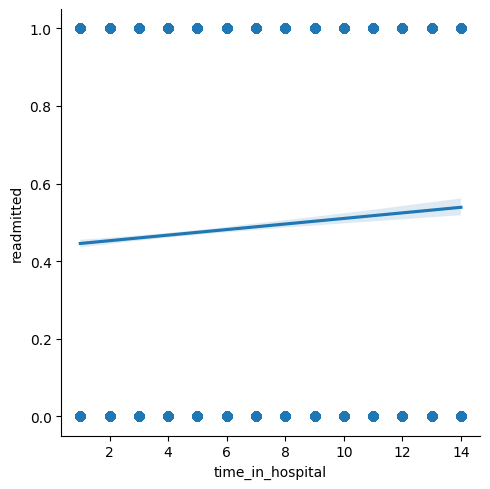

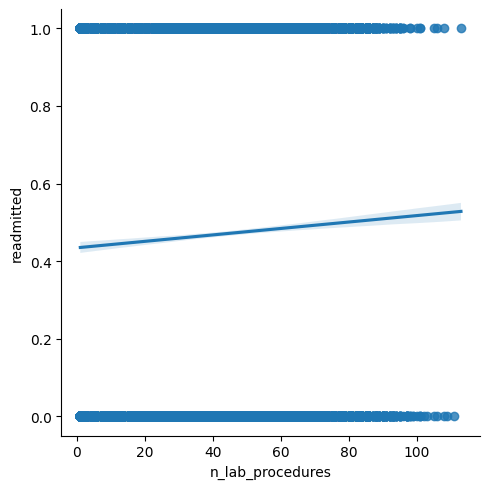

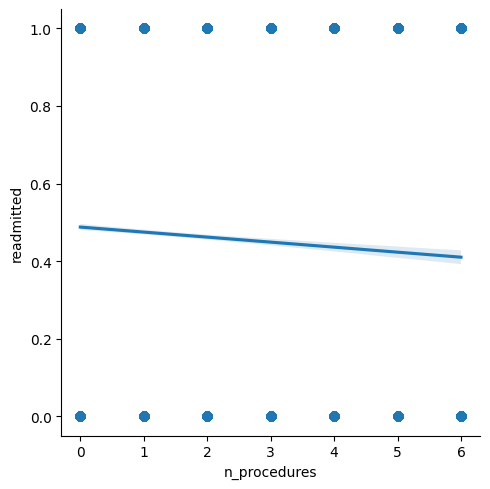

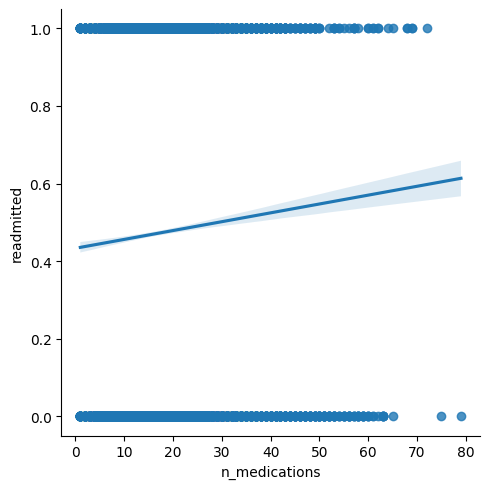

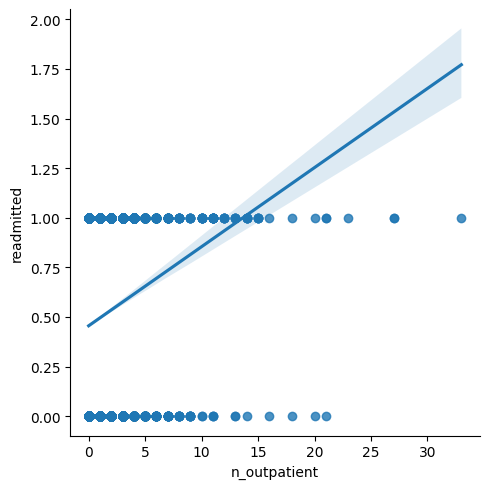

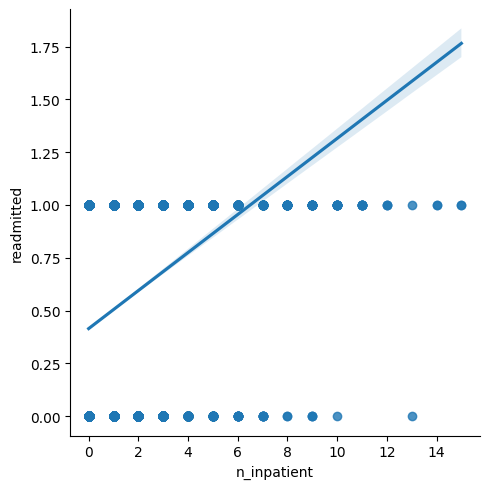

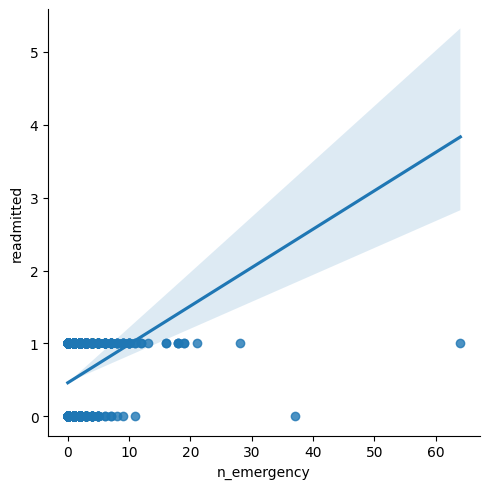

In [12]:
def makeplot(x, y, data):
    return sns.lmplot(x=x,y=y,data=data)

to_plot = list(df.columns[1:8])
for n in to_plot:
    makeplot(n, 'readmitted', df)

It seems that the number of outpatient, inpatient, and emergency visits plays a huge role in the probability of predicting weather a patient will be readmitted or not.